In [12]:
import sqlite3
conn = sqlite3.connect('bakayo_VS_chimon.db')
c = conn.cursor()

In [13]:
import pandas as pd

In [20]:
from datetime import datetime

datetime.now().strftime("%Y/%m/%d")
yesterday = int(datetime.now().strftime("%d")) - 1

In [21]:
def count_tweet(tbl_name):
    query = '''
    SELECT count(id), month, day, year
    FROM {tbl}
    WHERE day = {yesterday}
    GROUP BY month, day, year
    '''.format(tbl=tbl_name, yesterday=yesterday)
    count_id = c.execute(query)

    for row in count_id:
        cnt = row[0]
        print(row[0])
        
    return cnt

In [22]:
cnt_bakayo = count_tweet('bakayo_time')
cnt_chimon = count_tweet('chimon_time')

53
82


In [23]:
if cnt_bakayo == max(cnt_bakayo, cnt_chimon):
    winner = '馬鹿よ'
elif cnt_chimon == max(cnt_bakayo, cnt_chimon):
    winner = 'チーモン'

In [24]:
day = datetime.now().strftime("%m")
day += '/'
day += str(yesterday)
'''
昨日({day})のツイート数は、
馬鹿よ：{cnt_bakayo}
チーモン：{cnt_chimon}
で、{winner}の勝ち！
'''.format(day=day, cnt_bakayo=cnt_bakayo, cnt_chimon=cnt_chimon, winner=winner)

'\n昨日(12/1)のツイート数は、\n馬鹿よ：53\nチーモン：82\nで、チーモンの勝ち！\n'

In [19]:
df_VS = pd.concat([df_bakayo, df_chimon])

In [22]:
df_VS

,count_id,month,day,year
0,55.0,Nov,29.0,2016.0
0,37.0,Nov,29.0,2016.0


In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

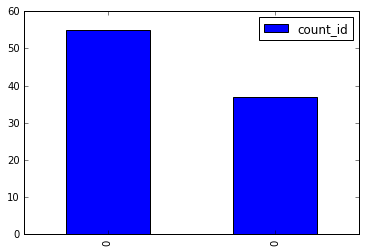

In [25]:
df_VS.plot.bar(y=['count_id'])